In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
%cd /content/gdrive/MyDrive

Mounted at /content/gdrive
/content/gdrive/MyDrive


In [ ]:
# 1. Tạo thư mục data/split_data và chạy lệnh chia train test
import os
import glob
import random
import shutil

raw_data_path = "/content/gdrive/MyDrive/SE405/data/raw_data/images"
train_data_path = "/content/gdrive/MyDrive/SE405/data/split_data/train"
test_data_path = "/content/gdrive/MyDrive/SE405/data/split_data/test"

if not os.path.exists("/content/gdrive/MyDrive/SE405/data/split_data/"):
  os.mkdir("/content/gdrive/MyDrive/SE405/data/split_data/")
  
try:
  shutil.rmtree(train_data_path)
  shutil.rmtree(test_data_path)
except:
  pass

os.mkdir(train_data_path)
os.mkdir(test_data_path)

total_files = glob.glob(raw_data_path + "/*.jpg")
print("Sample file = ", total_files[0])
print("Total file = ", len(total_files))

indices = list(range(len(total_files)))
train_indices = random.sample(indices, k = int(len(total_files)*0.9))
print("Total train file = ", len(train_indices))

for i in indices:
   
    if (i in train_indices):
        # Copy to train
        shutil.copy(total_files[i], train_data_path + total_files[i].replace(raw_data_path,""))
        shutil.copy(total_files[i].replace("images","labels").replace(".jpg",".xml"),
                    train_data_path + total_files[i].replace(raw_data_path, "").replace(".jpg",".xml"))
    else:
        # Copy to test
        shutil.copy(total_files[i], test_data_path + total_files[i].replace(raw_data_path, ""))
        shutil.copy(total_files[i].replace("images", "labels").replace(".jpg", ".xml"),
                    test_data_path + total_files[i].replace(raw_data_path, "").replace(".jpg",".xml"))

Sample file =  /content/gdrive/MyDrive/SE405/data/raw_data/images/134.jpg
Total file =  600
Total train file =  540


In [ ]:
import os
import glob
import pandas as pd
import xml.etree.ElementTree as ET


def xml_to_csv(path):
    xml_list = []
    for xml_file in glob.glob(path + '/*.xml'):
        tree = ET.parse(xml_file)
        root = tree.getroot()
        for member in root.findall('object'):
            value = (root.find('filename').text,
                     int(root.find('size')[0].text),
                     int(root.find('size')[1].text),
                     member[0].text,
                     int(member[4][0].text),
                     int(member[4][1].text),
                     int(member[4][2].text),
                     int(member[4][3].text)
                     )
            xml_list.append(value)
    column_name = ['filename', 'width', 'height', 'class', 'xmin', 'ymin', 'xmax', 'ymax']
    xml_df = pd.DataFrame(xml_list, columns=column_name)
    return xml_df

for directory in ['train','test']:
        image_path = os.path.join('/content/gdrive/MyDrive/SE405/data/split_data/{}'.format(directory))
        xml_df = xml_to_csv(image_path)
        xml_df.to_csv('/content/gdrive/MyDrive/SE405/data/split_data/{}_labels.csv'.format(directory), index=None)
        print('Successfully converted xml to csv.')

In [ ]:
# 4. Tải TF Object Detection APi vào thư mục models
%cd /content/gdrive/MyDrive/SE405
!git clone https://github.com/tensorflow/models.git

/content/gdrive/MyDrive/SE405
fatal: destination path 'models' already exists and is not an empty directory.


In [ ]:
# 5. Compile the protos -  
# Protocol Buffers (Protobuf) is a free and open-source cross-platform data format used to serialize structured data.
%cd /content/gdrive/MyDrive/SE405/models/research
!protoc object_detection/protos/*.proto --python_out=.

/content/gdrive/MyDrive/SE405/models/research


In [ ]:
# 6. Cài dặt API
%cd /content/gdrive/MyDrive/SE405/models/research
# !cp object_detection/packages/tf2/setup.py . 
!python -m pip install .

/content/gdrive/MyDrive/SE405/models/research
Processing /content/gdrive/MyDrive/SE405/models/research
  DEPRECATION: A future pip version will change local packages to be built in-place without first copying to a temporary directory. We recommend you use --use-feature=in-tree-build to test your packages with this new behavior before it becomes the default.
   pip 21.3 will remove support for this functionality. You can find discussion regarding this at https://github.com/pypa/pip/issues/7555.
     |████████████████████████████████| 10.2 MB 20.1 MB/s 
     |████████████████████████████████| 352 kB 70.3 MB/s 
     |████████████████████████████████| 1.8 MB 41.6 MB/s 
     |████████████████████████████████| 23.4 MB 66.2 MB/s 
     |████████████████████████████████| 1.3 MB 52.0 MB/s 
     |████████████████████████████████| 2.1 MB 51.2 MB/s 
     |████████████████████████████████| 1.1 MB 49.4 MB/s 
     |████████████████████████████████| 4.6 MB 38.8 MB/s 
     |█████████████████████████████

In [ ]:
!python object_detection/builders/model_builder_tf2_test.py

In [ ]:
# 8. CSV to TFRecord.
%cd /content/gdrive/MyDrive/SE405/models/research
# !git clone https://github.com/baodv1001/SSD_TF2
# !cp SSD_TF2/generate_tfrecord.py .
# !cp SSD_TF2/label_map.txt /content/gdrive/MyDrive/SE405/data

if not os.path.exists("/content/gdrive/MyDrive/SE405/data/tfrecord_data/"):
  os.mkdir("/content/gdrive/MyDrive/SE405/data/tfrecord_data/")

!python generate_tfrecord.py --image_dir=/content/gdrive/MyDrive/SE405/data/split_data/train --csv_input=/content/gdrive/MyDrive/SE405/data/split_data/train_labels.csv --output_path=/content/gdrive/MyDrive/SE405/data/tfrecord_data/train.record
!python generate_tfrecord.py --image_dir=/content/gdrive/MyDrive/SE405/data/split_data/test --csv_input=/content/gdrive/MyDrive/SE405/data/split_data/test_labels.csv --output_path=/content/gdrive/MyDrive/SE405/data/tfrecord_data/test.record

/content/gdrive/MyDrive/SE405/models/research
Successfully created the TFRecords: /content/gdrive/MyDrive/SE405/data/tfrecord_data/train.record
Successfully created the TFRecords: /content/gdrive/MyDrive/SE405/data/tfrecord_data/test.record


In [ ]:
# 9. Download pretrain and config
if not os.path.exists("/content/gdrive/MyDrive/SE405/pretrained"):
  os.mkdir("/content/gdrive/MyDrive/SE405/pretrained")

%cd /content/gdrive/MyDrive/SE405/pretrained
!wget http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz
# Unzip
!tar -xzvf ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz

# Config pipeline.config, label_map.txt if needed

In [ ]:
!apt install --allow-change-held-packages libcudnn8=8.1.0.77-1+cuda11.2

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following packages will be REMOVED:
  libcudnn8-dev
The following held packages will be changed:
  libcudnn8
The following packages will be upgraded:
  libcudnn8
1 upgraded, 0 newly installed, 1 to remove and 40 not upgraded.
Need to get 430 MB of archives.
After this operation, 3,139 MB disk space will be freed.
Get:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  libcudnn8 8.1.0.77-1+cuda11.2 [430 MB]
Fetched 430 MB in 9s (47.1 MB/s)
(Reading database ... 155629 files and directories currently installed.)
Removing libcudnn8-dev (8.0.5.39-1+cuda11.1) ...
(Reading database ... 155607 files and directories currently installed.)
Preparing to unpack .../libcudnn8_8.1.0.77-1+cuda11.2_amd64.deb ...
Unpacking libcudnn8 (8.1.0.77-1+c

In [ ]:
# Upload label file object-detection.txt to data folder
%cd /content/gdrive/MyDrive/SE405/models
!pip install -r /content/gdrive/MyDrive/SE405/models/research/SSD_TF2/setup.txt
!pip install --upgrade opencv-python
!pip install opencv-python-headless==4.1.2.30

/content/gdrive/MyDrive/SE405/models
     |████████████████████████████████| 60.5 MB 63 kB/s 
  Attempting uninstall: opencv-python
    Found existing installation: opencv-python 4.1.2.30
    Uninstalling opencv-python-4.1.2.30:
      Successfully uninstalled opencv-python-4.1.2.30
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.
     |████████████████████████████████| 21.8 MB 88.1 MB/s 
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.5.5.64
    Uninstalling opencv-python-headless-4.5.5.64:
      Successfully uninstalled opencv-python-headless-4.5.5.64


In [ ]:
# Train
%cd /content/gdrive/MyDrive/SE405/models/research
%cp /content/gdrive/MyDrive/SE405/models/research/object_detection/model_main_tf2.py .

#train 
!python model_main_tf2.py \
--pipeline_config_path=/content/gdrive/MyDrive/SE405/pretrained/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/pipeline.config \
--model_dir=/content/gdrive/MyDrive/SE405/output_model --alsologtostderr --num_train_steps=10000

In [ ]:
%cd /content/gdrive/MyDrive/SE405/models/research
%cp /content/gdrive/MyDrive/SE405/models/research/object_detection/exporter_main_v2.py .

!python exporter_main_v2.py \
--trained_checkpoint_dir=/content/gdrive/MyDrive/SE405/output_model \
--pipeline_config_path=/content/gdrive/MyDrive/SE405/pretrained/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/pipeline.config \
--output_directory=/content/gdrive/MyDrive/SE405/export_model

In [ ]:
import io
import os
import scipy.misc
import numpy as np
import six
import time
import glob
from IPython.display import display

from six import BytesIO

import matplotlib
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw, ImageFont

import tensorflow as tf
from object_detection.utils import ops as utils_ops
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as vis_util

#Load model
tf.keras.backend.clear_session()
model = tf.saved_model.load("/content/gdrive/MyDrive/SE405/export_model/saved_model")

In [ ]:
# Các hàm inference

import cv2
def run_inference_for_single_image(model, image):
  
  image = np.asarray(image)
  input_tensor = tf.convert_to_tensor(image)
  input_tensor = input_tensor[tf.newaxis,...]

  model_fn = model.signatures['serving_default']
  output_dict = model_fn(input_tensor)

  num_detections = int(output_dict.pop('num_detections'))
  output_dict = {key:value[0, :num_detections].numpy() 
                 for key,value in output_dict.items()}
  output_dict['num_detections'] = num_detections
  output_dict['detection_classes'] = output_dict['detection_classes'].astype(np.int64)
   
  if 'detection_masks' in output_dict:
    detection_masks_reframed = utils_ops.reframe_box_masks_to_image_masks(
              output_dict['detection_masks'], output_dict['detection_boxes'],
               image.shape[0], image.shape[1])      
    detection_masks_reframed = tf.cast(detection_masks_reframed > 0.5,
                                       tf.uint8)
    output_dict['detection_masks_reframed'] = detection_masks_reframed.numpy()
    
  return output_dict

def load_image_into_numpy_array(path):
  img_data = tf.io.gfile.GFile(path, 'rb').read()
  image = Image.open(BytesIO(img_data))
  (im_width, im_height) = image.size
  return np.array(image.getdata()).reshape(
      (im_height, im_width, 3)).astype(np.uint8)

[Errno 2] No such file or directory: '/content/gdrive/MyDrive/models/research'
/content/gdrive/MyDrive/SE405/models
Done load image 
Done inference
[1 2 2 2 3 2 2 3 1 1 2 2 1 2 1 2 2 2 3 2 1 2 2 3 2 2 1 2 3 2 2 1 1 3 1 1 2
 3 1 2 1 2 2 3 2 2 2 1 3 3 2 1 3 3 1 2 3 1 2 2 1 1 1 3 1 2 2 3 1 1 2 2 3 2
 2 1 2 1 1 2 1 2 2 1 2 3 1 2 3 1 3 1 1 2 2 1 1 1 2 2]
Done draw on image 


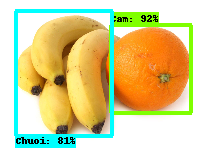

In [ ]:
%cd /content/gdrive/MyDrive/models/research
category_index = label_map_util.create_category_index_from_labelmap("/content/gdrive/MyDrive/SE405/data/label_map.txt", use_display_name=True)

image_path = '/content/gdrive/MyDrive/SE405/data/test_data/5.jpg'
image_np = load_image_into_numpy_array(image_path)
print("Done load image ")
image_np = cv2.resize(image_np, dsize=None, fx=0.2, fy=0.2)
output_dict = run_inference_for_single_image(model, image_np)
print("Done inference")
print(output_dict['detection_classes'])
vis_util.visualize_boxes_and_labels_on_image_array(
    image_np,
    output_dict['detection_boxes'],
    output_dict['detection_classes'],
    output_dict['detection_scores'],
    category_index,
    instance_masks=output_dict.get('detection_masks_reframed', None),
    use_normalized_coordinates=True,
    line_thickness=4)
print("Done draw on image ")
display(Image.fromarray(image_np))

In [ ]:
%cd /content/gdrive/MyDrive/SE405/models/research
%cp /content/gdrive/MyDrive/SE405/models/research/object_detection/export_tflite_graph_tf2.py .

!python export_tflite_graph_tf2.py \
    --pipeline_config_path=/content/gdrive/MyDrive/SE405/pretrained/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/pipeline.config \
    --trained_checkpoint_dir /content/gdrive/MyDrive/SE405/output_model \
    --output_directory /content/gdrive/MyDrive/SE405/output_model

/content/gdrive/MyDrive/SE405/models/research
2022-05-20 09:14:52.978795: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
W0520 09:15:10.304906 140315798722432 save_impl.py:72] Skipping full serialization of Keras layer <object_detection.meta_architectures.ssd_meta_arch.SSDMetaArch object at 0x7f9d5088d110>, because it is not built.
W0520 09:15:10.714991 140315798722432 save_impl.py:72] Skipping full serialization of Keras layer <keras.layers.convolutional.SeparableConv2D object at 0x7f9d4ca58810>, because it is not built.
W0520 09:15:10.715280 140315798722432 save_impl.py:72] Skipping full serialization of Keras layer <object_detection.core.freezable_batch_norm.FreezableBatchNorm object at 0x7f9d4bfac6d0>, because it is not built.
W0520 09:15:10.715407 140315798722432 save_impl.py:72] Skipping full serialization of Keras layer <keras.layers.core.lambda_layer.Lambda object at 0x7f9d4bfac690>, because 

In [ ]:
!tflite_convert --saved_model_dir=/content/gdrive/MyDrive/SE405/output_model/saved_model --output_file=/content/gdrive/MyDrive/SE405/output_model/saved_model/model.tflite



2022-05-20 09:21:43.351531: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2022-05-20 09:21:57.967216: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:363] Ignored output_format.
2022-05-20 09:21:57.967305: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:366] Ignored drop_control_dependency.
2022-05-20 09:21:57.967324: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:372] Ignored change_concat_input_ranges.
Estimated count of arithmetic ops: 1.706 G  ops, equivalently 0.853 G  MACs
W0520 09:22:04.007325 139633835374464 lite.py:742] Buffer deduplication procedure will be skipped when flatbuffer library is not properly loaded


In [ ]:
!pip install tflite-support
!python ./metadata_writer_for_image_classifier.py \
    --model_file=/content/gdrive/MyDrive/SE405/output_model/saved_model/model.tflite \
    --label_file=/content/gdrive/MyDrive/SE405/data/label_map.txt \
    --export_directory=/content/gdrive/MyDrive/SE405/output_model/saved_model/detect.tflite

     |████████████████████████████████| 42.5 MB 1.3 MB/s 
     |████████████████████████████████| 1.0 MB 39.4 MB/s 
     |████████████████████████████████| 213 kB 49.2 MB/s 
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.17.3
    Uninstalling protobuf-3.17.3:
      Successfully uninstalled protobuf-3.17.3
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 2.0
    Uninstalling flatbuffers-2.0:
      Successfully uninstalled flatbuffers-2.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.8.0+zzzcolab20220506162203 requires tf-estimator-nightly==2.8.0.dev2021122109, which is not installed.


python3: can't open file './metadata_writer_for_image_classifier.py': [Errno 2] No such file or directory
